# Isolation Forest Outlier Detection
In this section I will apply **Isolation Forest** outlier detection to the plan health dataset.
## Steps:
1. Load the raw dataset
2. Apply the same pre-procesising pipeline as the clustering stage
3. Fit an isolation forest model on the resulting PCA features
4. Visualize the outliers in a 2D projection of the feature space

In [2]:
import os, sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd()))
SRC_DIR = os.path.join(PROJECT_ROOT, "src")
if SRC_DIR not in sys.path:
    sys.path.insert(0, SRC_DIR)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

from preprocessing import preprocess

In [3]:
df = pd.read_csv("../../data/plant_health_data.csv")
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [4]:
cleaned = preprocess(df, attr=[]) 
X = cleaned.copy()
X.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Timestamp,,,,,,,,,,,
2024-10-03 10:54:53.407995,0.278321,-0.511285,0.662825,0.049963,-0.247408,-1.620166,-1.746638,1.355983,0.768579,0.108796,-0.080646
2024-10-03 16:54:53.407995,-1.184139,-0.666361,-0.435676,1.035845,-0.072300,1.051744,0.052635,-0.424888,-1.043216,-0.770972,-1.431377
2024-10-03 22:54:53.407995,-0.924655,-0.819209,-1.557519,1.478694,-0.094261,-1.491368,-0.066879,-0.234739,0.479665,1.015220,0.163452
2024-10-04 04:54:53.407995,-1.126428,-0.408656,0.962382,0.380088,-1.626583,-1.615750,-1.141667,-0.356286,-0.330470,0.352435,0.344986
2024-10-04 10:54:53.407995,1.696462,1.433049,-0.633556,1.015672,-0.736748,-1.039349,-1.664853,0.666060,0.646682,1.542359,1.082045


## Isolation Forest setup
Isolation Forest is an ensemble of random trees trained to isolate individual points. This is used for outlier detection by recognizing points that can be isolated very quickly, and receive low anomoly scores. To accomplish this, I will:
- Train the model on the PCA features extracted from the sensor data
- Use a fixed random seed for reproducability
- Let the model infer the proportion of outliers

In [5]:
# Training the model
iso = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)
iso.fit(X)

# -1 = outlier, 1 = inlier
preds = iso.predict(X)
scores = iso.decision_function(X)
n_outliers = np.sum(preds == -1)
n_inliers = np.sum(preds == 1)

print(f"Number of inliers:  {n_inliers}")
print(f"Number of outliers: {n_outliers}")
print(f"Fraction outliers:  {n_outliers / len(preds):.3f}")

Number of inliers:  1140
Number of outliers: 60
Fraction outliers:  0.050


## Examining the results
After running our Isolation Forest, with initially setting the contamination level to "auto", the Isolation Forest classified about 70% of the data points as outliers. This behavior suggests that the algorithm did not find a single dense "normal" core in the high dimensional sensor space, and it treated many points as outliers.

To obtain a more realistic outlier rate, we set the contamination parameter to 5%, which enforces a smaller fraction of samples are flagged as anomolies. We will visualize this next to examine if these points appear to be valid outliers.

In [6]:
# Viewing the output
X_out = X.copy()
X_out["is_outlier"] = (preds == -1).astype(int)
X_out

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,is_outlier
Timestamp,,,,,,,,,,,,
2024-10-03 10:54:53.407995,0.278321,-0.511285,0.662825,0.049963,-0.247408,-1.620166,-1.746638,1.355983,0.768579,0.108796,-0.080646,0
2024-10-03 16:54:53.407995,-1.184139,-0.666361,-0.435676,1.035845,-0.072300,1.051744,0.052635,-0.424888,-1.043216,-0.770972,-1.431377,0
2024-10-03 22:54:53.407995,-0.924655,-0.819209,-1.557519,1.478694,-0.094261,-1.491368,-0.066879,-0.234739,0.479665,1.015220,0.163452,0
2024-10-04 04:54:53.407995,-1.126428,-0.408656,0.962382,0.380088,-1.626583,-1.615750,-1.141667,-0.356286,-0.330470,0.352435,0.344986,0
2024-10-04 10:54:53.407995,1.696462,1.433049,-0.633556,1.015672,-0.736748,-1.039349,-1.664853,0.666060,0.646682,1.542359,1.082045,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 04:54:53.493508,0.525571,1.048262,-1.561354,-0.021064,0.166063,-1.390877,-0.009874,-1.339201,-0.733189,-1.195476,-0.475251,0
2024-11-01 10:54:53.493508,-1.108602,-0.549694,-1.616173,0.727684,0.684081,-0.971854,1.316460,-0.440430,0.156786,-0.435783,0.800634,0
2024-11-01 16:54:53.493508,-0.185748,-0.674071,-1.521070,-1.612468,-1.397725,1.539182,0.716310,1.604562,-0.140515,0.407937,-0.187423,0


## Visualizing outliers in 2D space
The scatter plot below shows the first two principal components of the feature space. The blue points correspond to inliers (normal sensor behavior), while the red points correpsond to the samples flagged as outliers by the Isolation Forest.

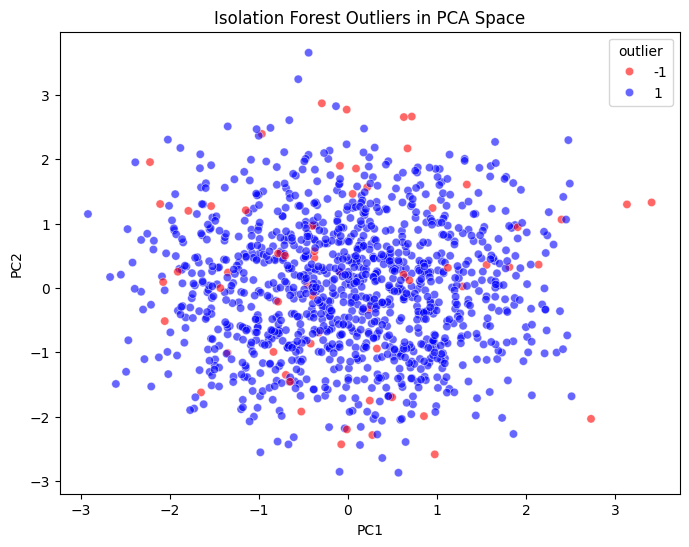

In [7]:
pca2 = PCA(n_components=2)
pcs2 = pca2.fit_transform(X)

df_plot = pd.DataFrame({
    "PC1": pcs2[:,0],
    "PC2": pcs2[:,1],
    "outlier": preds
})

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_plot,
    x="PC1", y="PC2",
    hue="outlier",
    palette={1:"blue", -1:"red"},
    alpha=0.6
)

plt.title("Isolation Forest Outliers in PCA Space")
plt.show()

## Conclusion
As we can see from the plot above, the outliers tend to lie near the outer edges of the main cluster of points, or in relatively sparse regions. The outliers do not form a single cluster, they are scattered around the outside which suggests they are ikely due to noisy / unreliable measurements. These points appear to be sparse and randomly spread throughout the plot. This suggests it may be ideal to remove the outliers for further classification.